In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style = "darkgrid")

import warnings
warnings.filterwarnings("ignore", category = Warning)

from sklearn.datasets import load_boston
boston = load_boston()


#Make sure the data is loaded correctly.


In [2]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
col_names = boston.feature_names
df = pd.DataFrame(boston.data, columns = col_names)
df['MEDV'] = boston.target

# Make sure the data is loaded correctly.
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2



#1.The model possible for this house price prediction are "Linear regression model", "Random forest".

#The output for this problem is expected to be a scalar (a constant).

# 2.Model Input / Output


In [3]:
x = df.iloc[:,:-1]
y = df["MEDV"]

# According to the defenition in this dataset, it is suitable to define "MEDV" as output and others variables as input features.

# 3.EDA

             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.1057

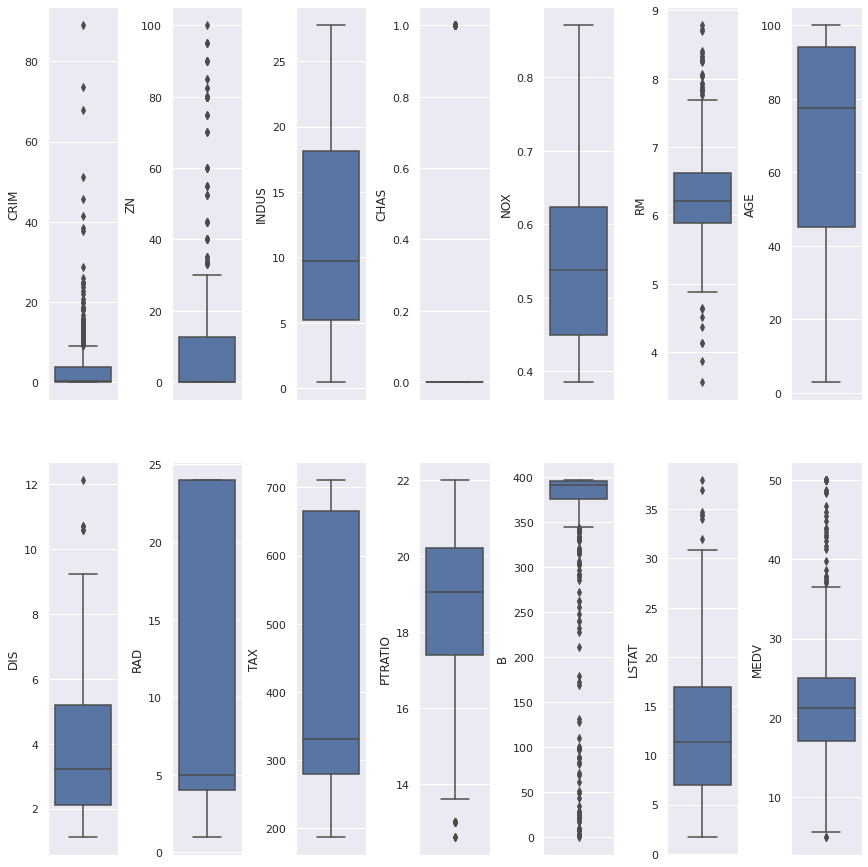

In [4]:
print(df.describe())
fig, ax = plt.subplots(ncols = 7, nrows = 2,figsize = (12, 12))
index = 0
ax = ax.flatten()
for k, v in df.items():
  sns.boxplot(y = k, data = df, ax = ax[index])
  index += 1

plt.tight_layout(pad = 0.4, w_pad = 0.5, h_pad = 5.0)

# According to the result of brief EDA, CHAS is a dummy, while the others are numerical feartures.
# The variaties of the features are quite high; therefore, regularization is required.

<AxesSubplot:>

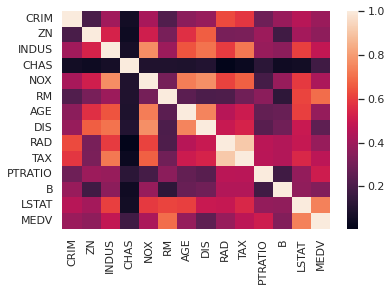

In [5]:
# Absolute correlation coefficients among all variables.
corr = df.corr().abs()
sns.heatmap(corr)
# It seems that (besides dummy) some of the features are correlated to themselves.

In [6]:
# There's no missing value in the dataset.
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [7]:
# DataPreprocessing

# Ignore correlation coefficients which are too low to the output(set at 0.35).
cor_limit = 0.35
corr_list = x[x.columns[:]].apply(lambda x : x.corr(y))
cols = []
for i in corr_list.index:
  if (corr_list[i] >= cor_limit or corr_list[i] <= -cor_limit):
    cols.append(i)

# New data(x, input) with high correlation (HC) coefficients with Y.
HC_x = df[cols]
HC_x.head()

,CRIM,ZN,INDUS,NOX,RM,AGE,RAD,TAX,PTRATIO,LSTAT
0,0.00632,18.0,2.31,0.538,6.575,65.2,1.0,296.0,15.3,4.98
1,0.02731,0.0,7.07,0.469,6.421,78.9,2.0,242.0,17.8,9.14
2,0.02729,0.0,7.07,0.469,7.185,61.1,2.0,242.0,17.8,4.03
3,0.03237,0.0,2.18,0.458,6.998,45.8,3.0,222.0,18.7,2.94
4,0.06905,0.0,2.18,0.458,7.147,54.2,3.0,222.0,18.7,5.33


In [8]:
# Regularization. For the large variaties in the input features.
# MaxAbsScaler - For the highest explain power among all scalers from view of PCA and high predition accuracy.

from sklearn.preprocessing import MaxAbsScaler 
Z = HC_x

scaler = MaxAbsScaler()
scaler.fit(Z)
Z = scaler.transform(Z)

HC_x.iloc[:,:] = Z

"""
#decomposition(PCA if needed)
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
L = pca.fit_transform(Z)


#explain percentage
pca_explained = PCA()
pca_explained.fit(Z)
p_pca = np.round(pca_explained.explained_variance_ratio_, 2)
print("The 2 components explain percentage : " + str(round(p_pca[0]+p_pca[1],4)))
"""

'\n#decomposition(PCA if needed)\nfrom sklearn.decomposition import PCA\n\npca = PCA(n_components = 2)\nL = pca.fit_transform(Z)\n\n\n#explain percentage\npca_explained = PCA()\npca_explained.fit(Z)\np_pca = np.round(pca_explained.explained_variance_ratio_, 2)\nprint("The 2 components explain percentage : " + str(round(p_pca[0]+p_pca[1],4)))\n'

In [9]:
# Make sure the input is regularized.
HC_x.describe()

,CRIM,ZN,INDUS,NOX,RM,AGE,RAD,TAX,PTRATIO,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,0.040612,0.113636,0.401470,0.636849,0.715790,0.685749,0.397892,0.574173,0.838888,0.333238
std,0.096672,0.233225,0.247309,0.133040,0.080025,0.281489,0.362802,0.237042,0.098407,0.188071
min,0.000071,0.000000,0.016583,0.442021,0.405581,0.029000,0.041667,0.263010,0.572727,0.045562
25%,0.000922,0.000000,0.187094,0.515499,0.670330,0.450250,0.166667,0.392405,0.790909,0.183039
50%,0.002883,0.000000,0.349315,0.617681,0.707118,0.775000,0.208333,0.464135,0.865909,0.299184
75%,0.041327,0.125000,0.652487,0.716418,0.754385,0.940750,1.000000,0.936709,0.918182,0.446537
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# 4.Training set and Testing set seperation. (by 15%)


In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(HC_x, y, test_size = 0.15)

# 5.Fitting of each ML model.


In [11]:
from sklearn import metrics
from sklearn.linear_model import LinearRegression

# Create a Linear Regression Model.
lm = LinearRegression()
lm.fit(x_train, y_train)
LinearRegression(fit_intercept=True, n_jobs=None)

LinearRegression()

In [12]:
# Model fitting on training data.
y_pred_lm = lm.predict(x_train)
print('R^2:',round(metrics.r2_score(y_train, y_pred_lm), 4))
print('Adjusted R^2:',round(1 - (1-metrics.r2_score(y_train, y_pred_lm))*(len(y_train) - 1)/(len(y_train) - x_train.shape[1] - 1),4))
print('MSE:',round(metrics.mean_squared_error(y_train, y_pred_lm),4))

R^2: 0.6993
Adjusted R^2: 0.6921
MSE: 26.1001


In [13]:
# Predicting with the testing data.
y_test_pred_lm = lm.predict(x_test)

# Model Evaluation
score_linreg = metrics.r2_score(y_test, y_test_pred_lm)
print('R^2:', round(score_linreg,4))
print('Adjusted R^2:',round(1 - (1-metrics.r2_score(y_test, y_test_pred_lm))*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1),4))
print('MSE:',round(metrics.mean_squared_error(y_test, y_test_pred_lm),4))

R^2: 0.6793
Adjusted R^2: 0.63
MSE: 22.7771


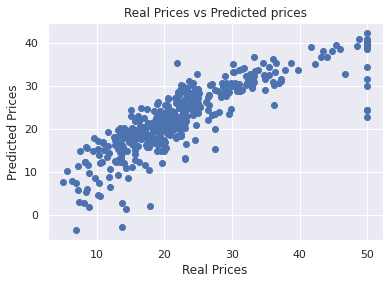

In [14]:
# Visualizing the differences between real prices and predicted prices.
plt.scatter(y_train, y_pred_lm)
plt.xlabel("Real Prices")
plt.ylabel("Predicted Prices")
plt.title("Real Prices vs Predicted prices")
plt.show()

p_val of normality test is : 8.049803151117528e-36, so it's normally distributed.



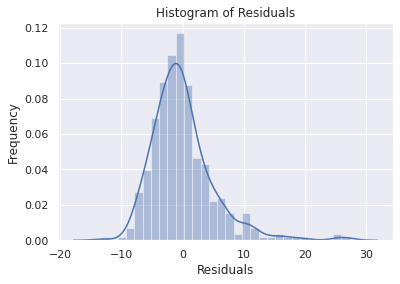

In [15]:
# Checking of Normality of residuals.
from scipy import stats
statsn, pval = stats.normaltest(y_train - y_pred_lm)
print("p_val of normality test is : " + str(pval) + ", so it's normally distributed." + "\n")

sns.distplot(y_train - y_pred_lm)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

In [16]:
# Import Random Forest Regressor.
from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest Regressor.
rfm = RandomForestRegressor()
rfm.fit(x_train, y_train)

RandomForestRegressor()

In [17]:
# Model fitting on training data.
y_pred_rf = rfm.predict(x_train)
print('R^2:',round(metrics.r2_score(y_train, y_pred_rf),4))
print('Adjusted R^2:',round(1 - (1-metrics.r2_score(y_train, y_pred_rf))*(len(y_train)-1)/(len(y_train)-x_train.shape[1]-1),4))
print('MSE:',round(metrics.mean_squared_error(y_train, y_pred_rf),4))

R^2: 0.976
Adjusted R^2: 0.9754
MSE: 2.083


In [18]:
# Predicting with the testing data.
y_test_pred_rf = rfm.predict(x_test)

# Model Evaluation
score_rf = round(metrics.r2_score(y_test, y_test_pred_rf),4)
print('R^2:', score_rf)
print('Adjusted R^2:',round(1 - (1-metrics.r2_score(y_test, y_test_pred_rf))*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1),4))
print('MSE:',round(metrics.mean_squared_error(y_test, y_test_pred_rf),4))

R^2: 0.8663
Adjusted R^2: 0.8458
MSE: 9.4939


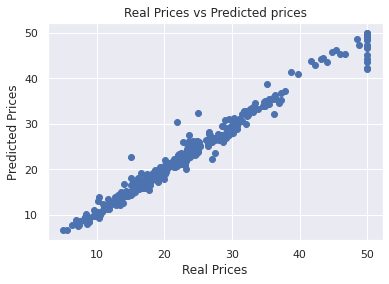

In [19]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(y_train, y_pred_rf)
plt.xlabel("Real Prices")
plt.ylabel("Predicted Prices")
plt.title("Real Prices vs Predicted prices")
plt.show()

p_val of normality test is : 1.3311902577279215e-21, so it's normally distributed.



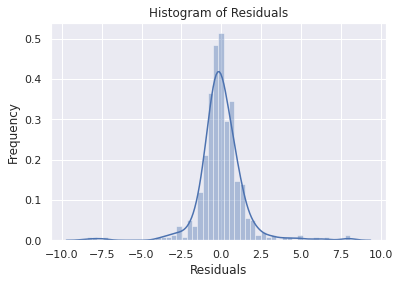

In [20]:
# Checking of Normality of residuals.
statsn, pval = stats.normaltest(y_train - y_pred_rf)
print("p_val of normality test is : " + str(pval) + ", so it's normally distributed." + "\n")

sns.distplot(y_train - y_pred_rf)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

In [21]:
# Comparison of Linear Regression model and Random Forest Regressor.
# It seems that both of the model do not occur serios overfitting or inder fitting problems.
# Random Forest Regressor seems to be outperforming the Linear Regression model.

# 5.Compare the accuracy with the regression models. 


In [22]:
print("The defenition of Acc. Here is referring to R-squared score.")
print("Acc. of Linear Regression Model : " + str(round(score_linreg, 4)))
print("Acc. of Random Forest Model : " + str(round(score_rf, 4)))

The defenition of Acc. Here is referring to R-squared score.
Acc. of Linear Regression Model : 0.6793
Acc. of Random Forest Model : 0.8663


# 6.Neural Nnetwork


In [23]:
import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from sklearn.metrics import r2_score


# Since the prediction accuracy for the output of a scalar would be 0 for most of the scenarios.
# Therefore, I decided to define the accuracy of NN model as R^2 as the classical linear regession model.
"""
from tensorflow.keras import backend as K

def ssr(y_true, y_pred):
  ss_res = K.sum(K.square(y_true - y_pred))
  ss_tot = K.sum(K.square(y_true - K.mean(y_true)))
  return(1 - (ss_res / (ss_tot + K.epsilon())))
"""

'\nfrom tensorflow.keras import backend as K\n\ndef ssr(y_true, y_pred):\n  ss_res = K.sum(K.square(y_true - y_pred))\n  ss_tot = K.sum(K.square(y_true - K.mean(y_true)))\n  return(1 - (ss_res / (ss_tot + K.epsilon())))\n'

In [24]:
# NN Model stacking.
model_nn = Sequential()
model_nn.add(Dense(10, input_dim = len(HC_x.columns)))
model_nn.add(Dense(10))
model_nn.add(Dense(10))
model_nn.add(Dense(1))
model_nn.compile(loss = "mse", optimizer = "rmsprop", metrics = [r2_score], run_eagerly = True)

model_nn.summary()

2022-12-05 13:17:17.832387: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                110       
_________________________________________________________________
dense_1 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 11        
Total params: 341
Trainable params: 341
Non-trainable params: 0
_________________________________________________________________


2022-12-05 13:17:18.279095: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/30
20/20 [==============================] - 5s 60ms/step - loss: 550.2806 - r2_score: -6.7891 - val_loss: 509.3455 - val_r2_score: -4.6462
Epoch 2/30
20/20 [==============================] - 1s 57ms/step - loss: 468.0719 - r2_score: -5.7202 - val_loss: 425.5466 - val_r2_score: -3.4199
Epoch 3/30
20/20 [==============================] - 1s 57ms/step - loss: 373.9273 - r2_score: -4.3381 - val_loss: 325.2667 - val_r2_score: -2.0890
Epoch 4/30
20/20 [==============================] - 1s 57ms/step - loss: 272.6080 - r2_score: -2.4913 - val_loss: 232.3489 - val_r2_score: -1.1219
Epoch 5/30
20/20 [==============================] - 1s 57ms/step - loss: 189.3460 - r2_score: -1.5415 - val_loss: 169.6804 - val_r2_score: -0.8865
Epoch 6/30
20/20 [==============================] - 1s 56ms/step - loss: 140.4627 - r2_score: -0.7720 - val_loss: 141.1949 - val_r2_score: -1.3927
Epoch 7/30
20/20 [==============================] - 1s 56ms/step - loss: 123.6893 - r2_score: -0.6321 - val_loss: 134.

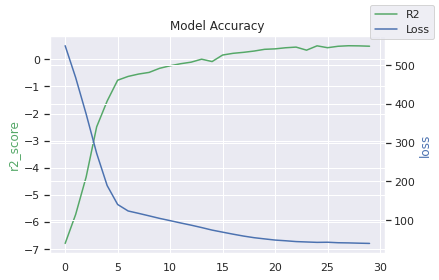

Brief view on the result of training.


In [25]:
# NN Model training.
# This dataset is a small one, which may somehow occur overfitting problem.

nn_result = model_nn.fit(x_train, y_train, batch_size = 20, epochs = 30, validation_split = 0.10)

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.plot(nn_result.history["r2_score"], color = "g", label = "R2")
ax2.plot(nn_result.history["loss"], color = "b", label = "Loss")

ax1.set_ylabel("r2_score", color = "g")
ax2.set_ylabel("loss", color = "b")

plt.title("Model Accuracy")
plt.xlabel("epoch")
fig.legend()
plt.show()

print("Brief view on the result of training.")

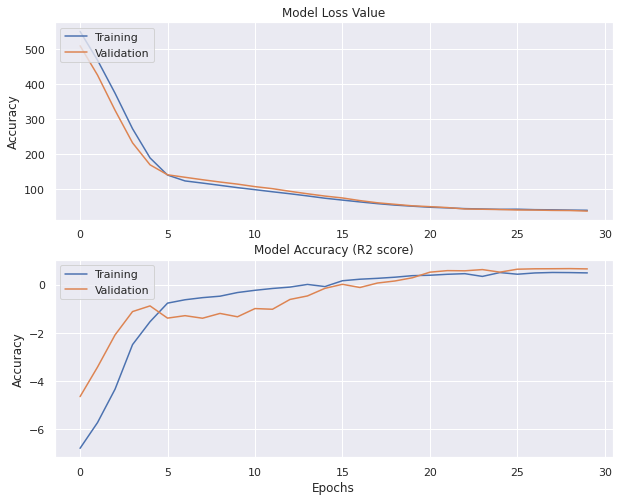

In [26]:
# Examine the process of NN_model on loss and R2 score.
plt.figure(figsize = (10, 8))
plt.subplot(211)  

plt.plot(nn_result.history["loss"])
plt.plot(nn_result.history["val_loss"])
plt.title("Model Loss Value")
plt.ylabel("Accuracy")
plt.legend(["Training", "Validation"], loc = "upper left")


plt.subplot(212)  

plt.plot(nn_result.history["r2_score"])
plt.plot(nn_result.history["val_r2_score"])
plt.title("Model Accuracy (R2 score)")
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.legend(["Training", "Validation"], loc = "upper left")
plt.show()

In [27]:
# Accuracy of well-trainde NN Model.
scores = model_nn.evaluate(x_test, y_test)
print("Accuracy of CNN is : " + str(round(scores[1],4)))
#The accuracyt is quite unstable...

3/3 [==============================] - 0s 38ms/step - loss: 38.5716 - r2_score: 0.3765
Accuracy of CNN is : 0.3765


In [28]:
# Compare the accuracy of all the regression models. 
print("The defenition of Acc. here is referring to R-squared score.")
print("Acc. of Linear Regression Model : " + str(round(score_linreg, 4)))
print("Acc. of Random Forest Model : " + str(round(score_rf, 4)))
print("Acc. of Neural Network Model : " + str(round(scores[1],4)))

The defenition of Acc. here is referring to R-squared score.
Acc. of Linear Regression Model : 0.6793
Acc. of Random Forest Model : 0.8663
Acc. of Neural Network Model : 0.3765
